# Predict political party based on votes

## Importing key libraries 

In [1]:
# For warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
# For normal python use
import pandas as pd

In [4]:
# For deep learning
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import cross_val_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [5]:
feature_names =  ['party','handicapped-infants', 'water-project-cost-sharing', 
                    'adoption-of-the-budget-resolution', 'physician-fee-freeze',
                    'el-salvador-aid', 'religious-groups-in-schools',
                    'anti-satellite-test-ban', 'aid-to-nicaraguan-contras',
                    'mx-missle', 'immigration', 'synfuels-corporation-cutback',
                    'education-spending', 'superfund-right-to-sue', 'crime',
                    'duty-free-exports', 'export-administration-act-south-africa']

## Loading dataset

In [6]:
voting_data = pd.read_csv('house-votes-84.data.txt', na_values=['?'], 
                          names = feature_names)

In [7]:
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,NaN,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,NaN
2,democrat,NaN,y,y,NaN,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,NaN,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,NaN,y,y,y,y


In [8]:
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,435,423,387,424,424,420,424,421,420,413,428,414,404,410,418,407,331
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,y,y,n,y,y,y,y,y,y,n,n,y,y,n,y
freq,267,236,195,253,247,212,272,239,242,207,216,264,233,209,248,233,269


In [9]:
voting_data.dropna(inplace=True)
voting_data.describe()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
count,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232,232
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,democrat,n,n,y,n,y,y,y,y,n,y,n,n,y,y,n,y
freq,124,136,125,123,119,128,149,124,119,119,128,152,124,127,149,146,189


In [10]:
voting_data['party'].value_counts()

democrat      124
republican    108
Name: party, dtype: int64

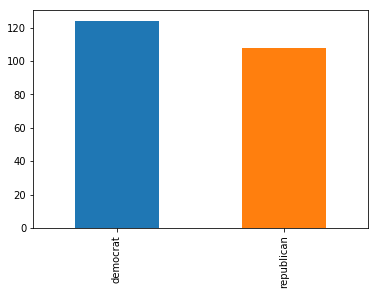

In [11]:
voting_data['party'].value_counts().sort_index().plot.bar()

## Checking missing values

In [12]:
voting_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 232 entries, 5 to 431
Data columns (total 17 columns):
party                                     232 non-null object
handicapped-infants                       232 non-null object
water-project-cost-sharing                232 non-null object
adoption-of-the-budget-resolution         232 non-null object
physician-fee-freeze                      232 non-null object
el-salvador-aid                           232 non-null object
religious-groups-in-schools               232 non-null object
anti-satellite-test-ban                   232 non-null object
aid-to-nicaraguan-contras                 232 non-null object
mx-missle                                 232 non-null object
immigration                               232 non-null object
synfuels-corporation-cutback              232 non-null object
education-spending                        232 non-null object
superfund-right-to-sue                    232 non-null object
crime                      

**None found**

## Transforming categorical variables to numerical i.e Dummy

In [13]:
voting_data.replace(('y', 'n'), (1, 0), inplace=True)
voting_data.replace(('democrat', 'republican'), (1, 0), inplace=True)

In [14]:
voting_data.head()

,party,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missle,immigration,synfuels-corporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
5,1,0,1,1,0,1,1,0,0,0,0,0,0,1,1,1,1
8,0,0,1,0,1,1,1,0,0,0,0,0,1,1,1,0,1
19,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,1,1
23,1,1,1,1,0,0,0,1,1,1,0,0,0,0,0,1,1
25,1,1,0,1,0,0,0,1,1,1,1,0,0,0,0,1,1


### Convert to numpy array to feed to keras

In [15]:
all_features = voting_data[feature_names].drop('party', axis=1).values
all_classes = voting_data['party'].values

## Model

In [16]:

def create_model():
    model = Sequential()
    #16 feature inputs (votes) going into an 32-unit layer 
    model.add(Dense(32, input_dim=16, kernel_initializer='normal', activation='relu'))
    # Another hidden layer of 16 units
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    # Output layer with a binary classification (Democrat or Republican political party)
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [17]:
# Wrap our Keras model in an estimator compatible with scikit_learn
estimator = KerasClassifier(build_fn=create_model, epochs=100, verbose=0)

In [18]:
# Now we can use scikit_learn's cross_val_score to evaluate this model identically to the others
cv_scores = cross_val_score(estimator, all_features, all_classes, cv=10)
cv_scores.mean()

0.939673912525177

**With our model, we have achieved 93% of accuracy** 